## **Capstone Project**

Github Link- https://github.com/susantkumarsahoo

## **Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

### **Problem Description**

### **Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**

### **You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rossmann_df = pd.read_csv('/content/drive/MyDrive/Retails Seles Prediction/Rossmann Stores Data (1).csv')
store_df = pd.read_csv('/content/drive/MyDrive/Retails Seles Prediction/store (1).csv')

<ipython-input-4-eb53a2ff9674>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df = pd.read_csv('/content/drive/MyDrive/Retails Seles Prediction/Rossmann Stores Data (1).csv')


In [ ]:
rossmann_df.shape

(1017209, 9)

In [ ]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.shape

(1115, 10)

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### **DATA HANDELLING**

In [ ]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
##  Replacing NAN values in CompetitionDistance with median
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
## Replacing NAN values with 0.
store_new  = store_df.copy()

In [ ]:
## Replacing NAN values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

In [ ]:
## Replacing NAN values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

In [ ]:
## Replacing NAN values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)


In [ ]:
## Replacing NAN values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)


In [ ]:
## Replacing NAN values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)


In [ ]:
## Now checking NAN values
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### **MERGING THE DATAFRAMES**

In [ ]:
final = pd.merge(rossmann_df, store_new, on='Store',how='left')

In [ ]:
final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
final.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [ ]:
final.shape

(1017209, 18)

## **Changing different dtypes to int type**

In [ ]:
final.loc[final['StateHoliday'] == '0', 'StateHoliday'] = 0
final.loc[final['StateHoliday'] == 'a', 'StateHoliday'] = 1
final.loc[final['StateHoliday'] == 'b', 'StateHoliday'] = 2
final.loc[final['StateHoliday'] == 'c', 'StateHoliday'] = 3
final['StateHoliday'] = final['StateHoliday'].astype(int, copy=False)

print('levels :', final['StateHoliday'].unique(), '; data type : ', final['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type :  int64


In [ ]:
final.loc[final['Assortment'] == 'a', 'Assortment'] = 0
final.loc[final['Assortment'] == 'b', 'Assortment'] = 1
final.loc[final['Assortment'] == 'c', 'Assortment'] = 2
final['Assortment'] = final['Assortment'].astype(int, copy=False)

print('levels:', final['Assortment'].unique(), '; data type :', final['Assortment'].dtype)

levels: [0 2 1] ; data type : int64


In [ ]:
final.loc[final['StoreType'] == 'a', 'StoreType'] = 0
final.loc[final['StoreType'] == 'b', 'StoreType'] = 1
final.loc[final['StoreType'] == 'c', 'StoreType'] = 2
final.loc[final['StoreType'] == 'd', 'StoreType'] = 3
final['StoreType'] = final['StoreType'].astype(int, copy=False)

print('levels:', final['StoreType'].unique(), '; data type :', final['StoreType'].dtype)

levels: [2 0 3 1] ; data type : int64


In [ ]:
## Changing the data format from object to datetime
final['Date'] = pd.to_datetime(final['Date'], format = '%Y-%m-%d')

In [ ]:
final['CompetitionOpenSinceYear'] = final['CompetitionOpenSinceYear'].astype(int)
final['Promo2SinceYear'] = final['Promo2SinceYear'].astype(int)

In [ ]:
final['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final['Date']).month

In [ ]:
final['CompetitionDistance'] = final['CompetitionDistance'].astype(int)
final['Promo2SinceWeek'] = final['Promo2SinceWeek'].astype(int)

In [ ]:
final.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

## **Exploratory Data Analysis**

In [ ]:
final.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5422.02,5.85,1370.17,0.50,11.65,1007.01
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7706.92,3.33,935.36,0.50,15.32,1005.88
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,710.00,3.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2325.00,6.00,2006.00,1.00,1.00,2009.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

Text(0.5, 1.0, 'Plot between Competition Open Since year and Sales')

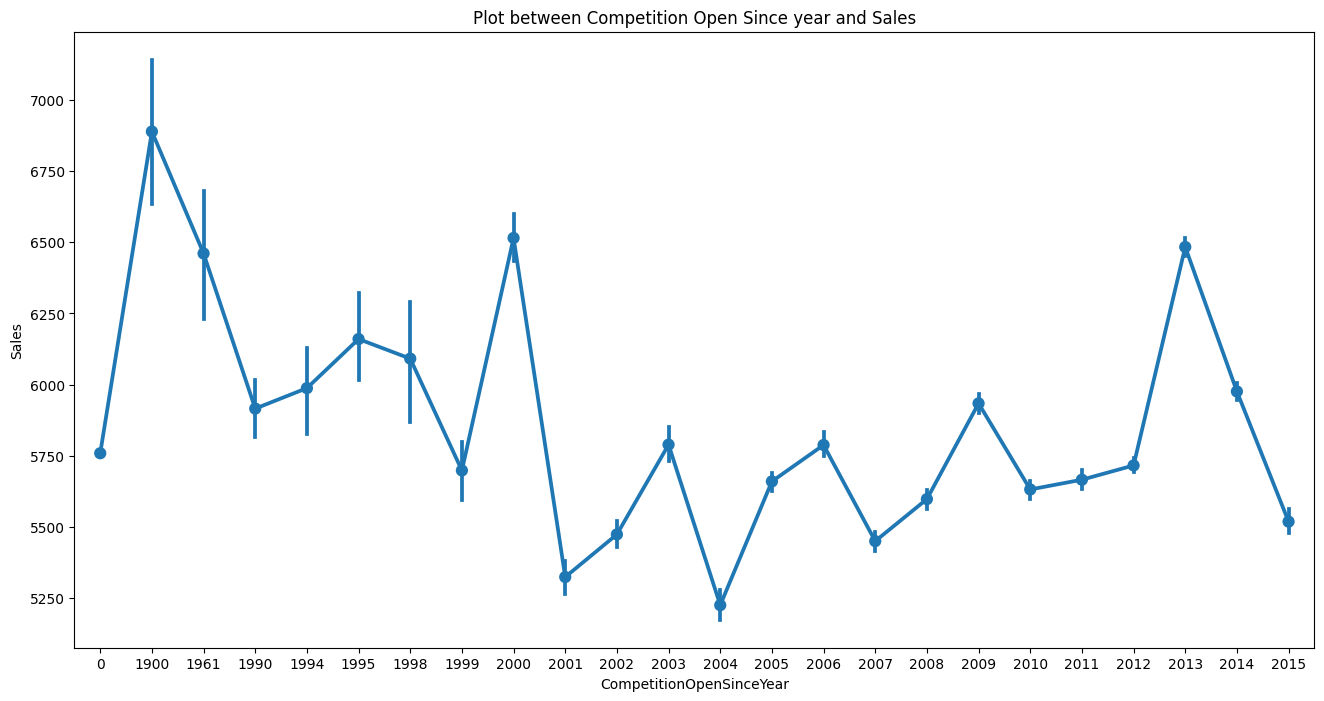

In [ ]:
plt.figure(figsize=(16,8))
sns.pointplot(x = 'CompetitionOpenSinceYear', y='Sales', data=final)
plt.title('Plot between Competition Open Since year and Sales')

Text(0.5, 1.0, 'Plot between Competition Open Since Month and Sales')

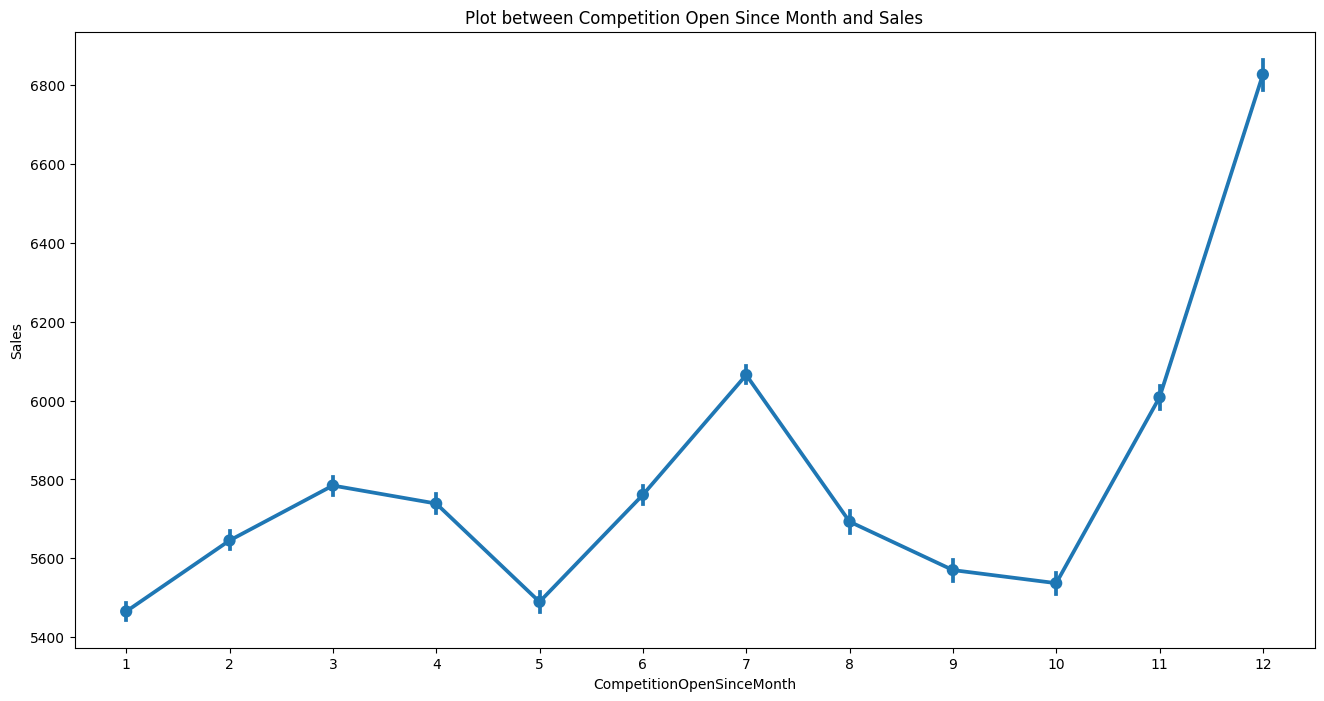

In [ ]:
plt.figure(figsize=(16,8))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y='Sales', data=final)
plt.title('Plot between Competition Open Since Month and Sales')

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

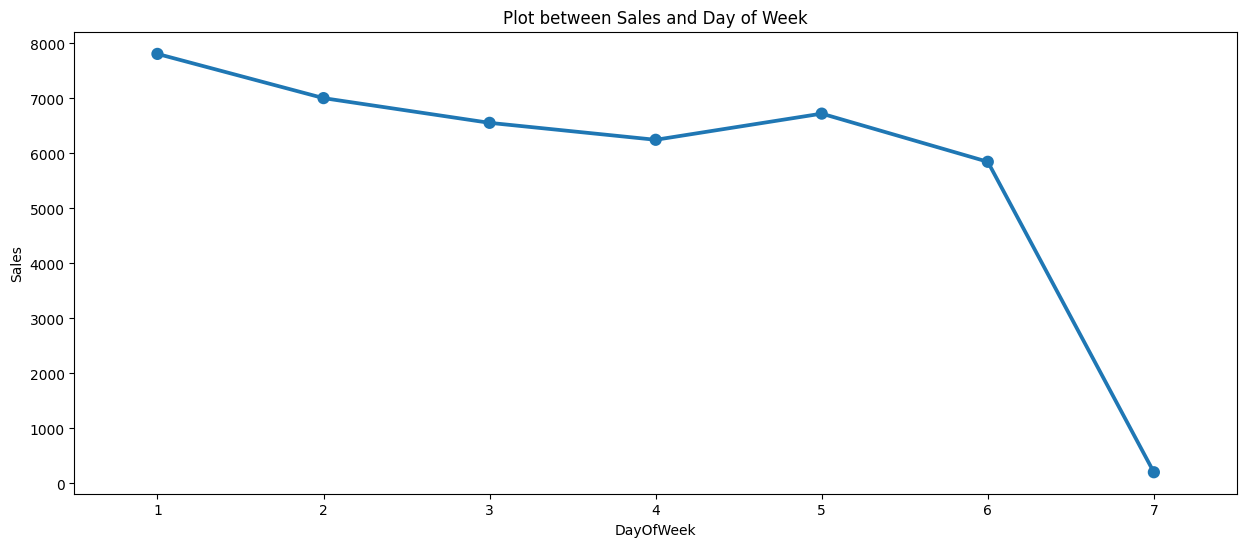

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data= final)
plt.title('Plot between Sales and Day of Week')

Text(0.5, 1.0, 'Store Daily Open Countplot')

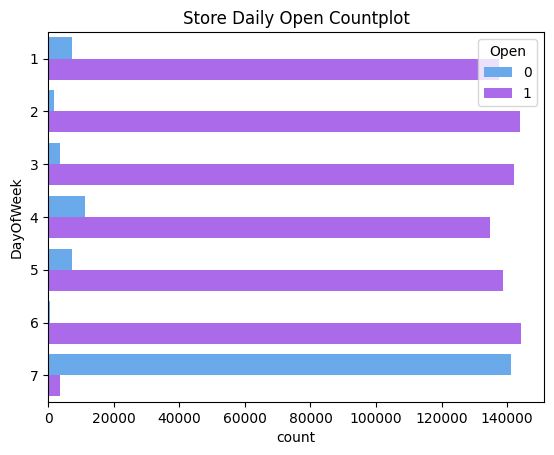

In [ ]:
sns.countplot(y= 'DayOfWeek', hue= 'Open', data= final, palette='cool')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

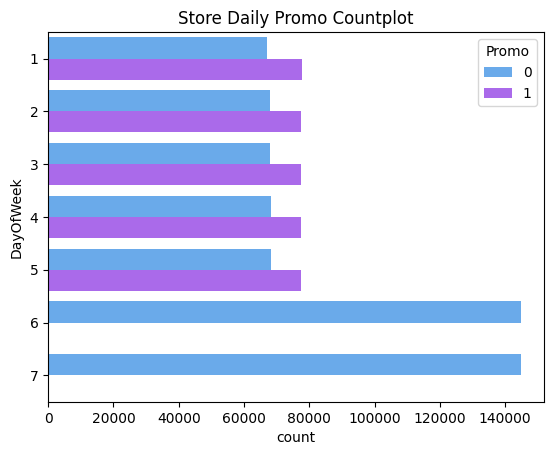

In [ ]:
sns.countplot(y= 'DayOfWeek', hue='Promo', data= final, palette= 'cool')
plt.title('Store Daily Promo Countplot')

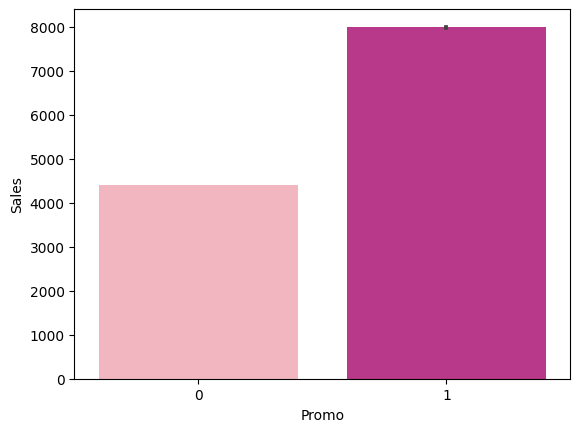

In [ ]:
promo_sales = sns.barplot(x= 'Promo', y= 'Sales', data= final, palette= 'RdPu')

Text(0.5, 1.0, 'Sales During State Holiday')

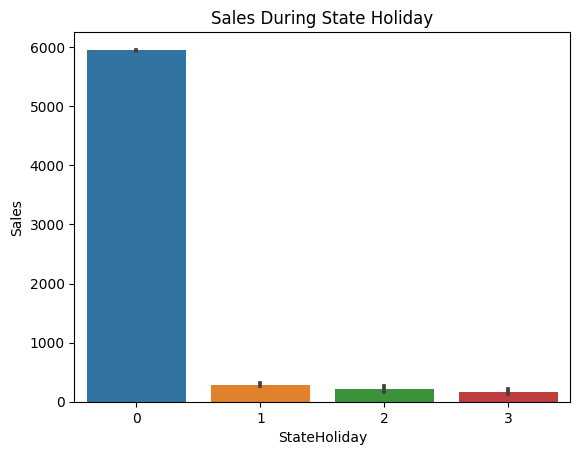

In [ ]:
Stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final)
plt.title('Sales During State Holiday')

Text(0.5, 1.0, 'Sales During School Holiday')

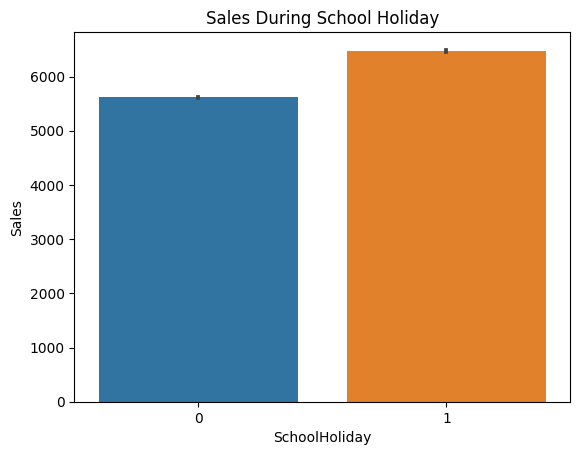

In [ ]:
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales",data=final)
plt.title('Sales During School Holiday')

Text(0.5, 1.0, 'Boxplot For Sales Values')

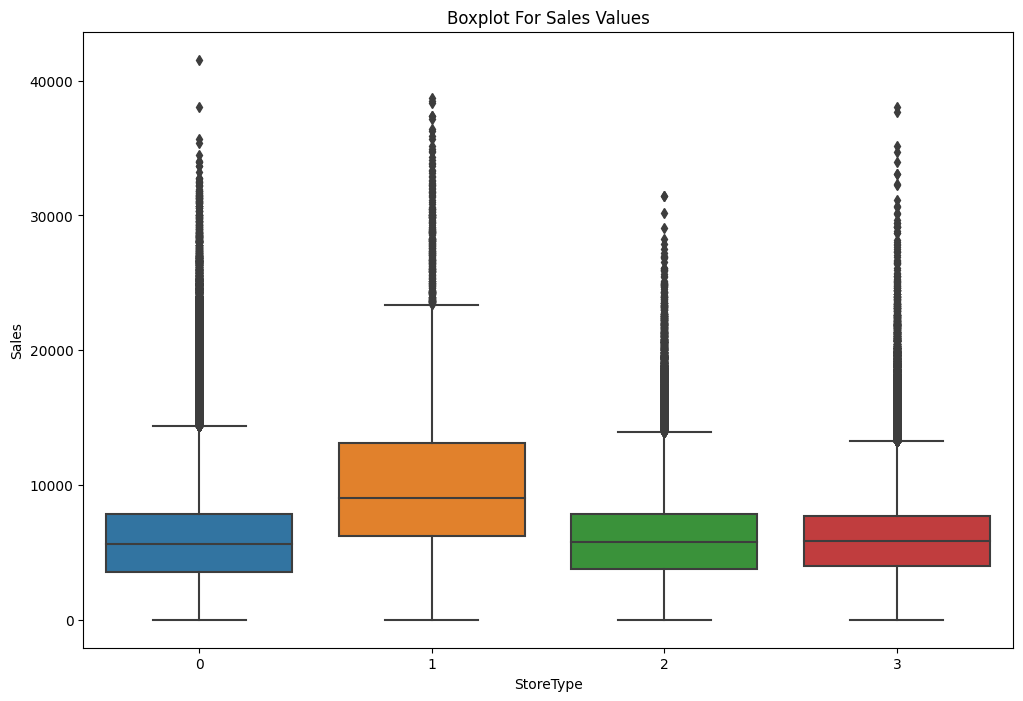

In [ ]:
plt.figure(figsize=(12,8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales  Values on the basis of Assortment Level')

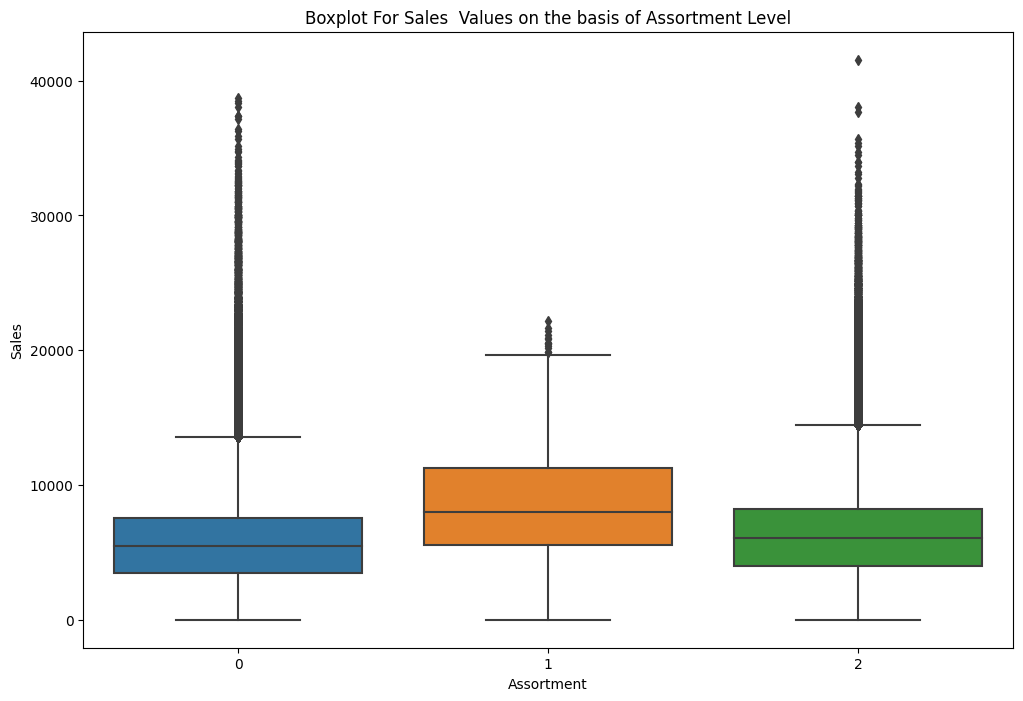

In [ ]:
plt.figure(figsize=(12,8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final)
plt.title('Boxplot For Sales  Values on the basis of Assortment Level')

## **Store Type**

In [ ]:
merged_df = pd.merge(rossmann_df, store_new, on='Store', how='left')

<ipython-input-44-75a8622e4069>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-44-75a8622e4069>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-44-75a8622e4069>:9: FutureWarning: The default value of numeric_only in DataF

Text(0.5, 1.0, 'Average Sales per Store Type \n Fig 1.4')

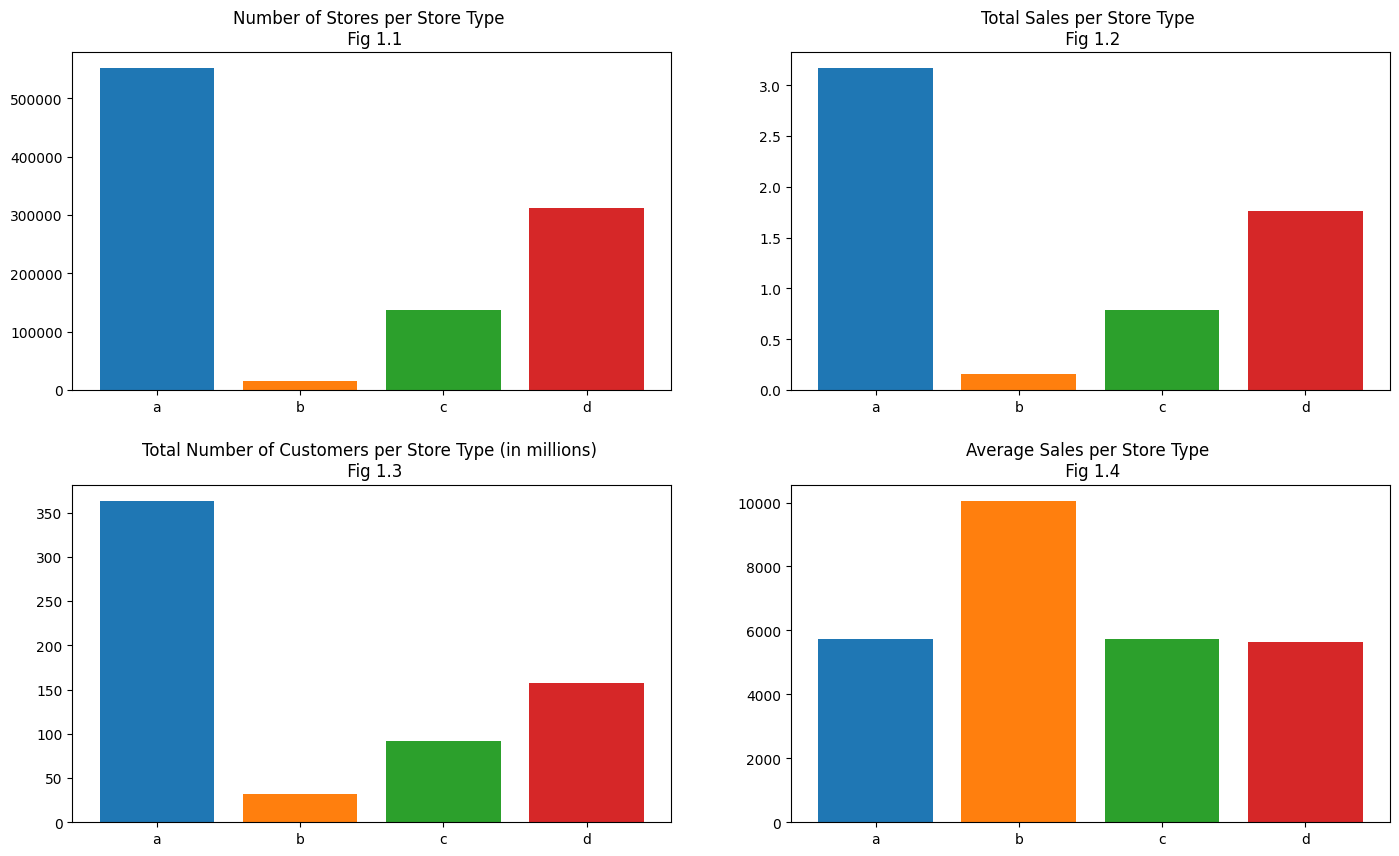

In [ ]:
import itertools
fig, axes = plt.subplots(2,2,figsize=(17,10))
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index, merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")

From the this training dataset we can see that storetype A has the highest number of branches, sales & customers from the four different storetype but it doesn't mean its the best performing storetype

when looking at the average sales and number of customers, we see that actually it is a storetype B who was the highest average sales and the highest average number of customers.

**Assortments**

As we cited in the description, assortments have three type and each store have defined type and assortment type

a means basic things

b means extra things

c means extende things so the highest variety of products

StoreType  Assortment
a          a             346389
           c             205238
b          a               6594
           b               8294
           c                942
c          a              70878
           c              65962
d          a             113584
           c             199328
Name: Assortment, dtype: int64

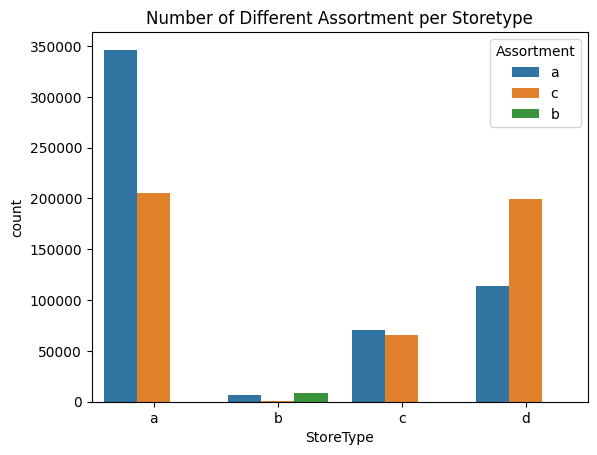

In [ ]:
storetype_Assortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"],data=merged_df,palette=sns.color_palette(n_colors=3)).set_title("Number of Different Assortment per Storetype")
merged_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

We can clearly see here that most of the stores have either a assortment type or C assortment. Interestingly enough storetype D which has the highest sales per customer average actually has mostly c assortment type, this most probabily the reason for having this high average in sales per customer. having variety in stores always increases the customers spending pattern

## **Conclusions From EDA**

* There are 2 datasets - 1)Rossmann.csv & 2)store.csv

* Shape of Rossmann dataset = (1017209,8) shape of store dataset = (1115,10)

* In both dataset 'Store' column is common. So we do inner join on the basis of column 'store'.

* On looking on datasets we find lots of NAN values in store dataset.

* Try to replace NAN values with suitable values. In competitiondistance column only 3 NAN values are there. So we replaced it with median.

* Now for rest of the columns (Competitionopensincemonth, * Competitionopensinceyear, Promo2, Promointerval) there are lots of NAN values and the best way to treat these values to replace with 0.

* After combinning shape of final dataset (1017209,18).

* Also there is some column such as 'stateholiday', 'Schoolholiday' & 'Assortments' which contains object values. so, try to change into int by giving suitable values.

* We also did some graphs analysis and we got are:

* From plot sales and competition open since month shows sales go increasing from november and highest in month december. This may be due to Cristmas Eve and New Year.

* From plot sales and day of week, sales highest on monday and start declining from tuesday to saturday and on sunday sales almost near to 0. This because on sunday all stores be closed.

* Plot between promotion and sales shows that promotion helps in increaseing sales. This similar trends also shows with customers.

* Plot between state holidays and sales shows that during public holiday sales are actually high but for other holidays such as Ester and Christmas sales be very low. This is because Easter and Christmas stores also closed so sales goes down.



## **Feature Engineering**

In [ ]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek']


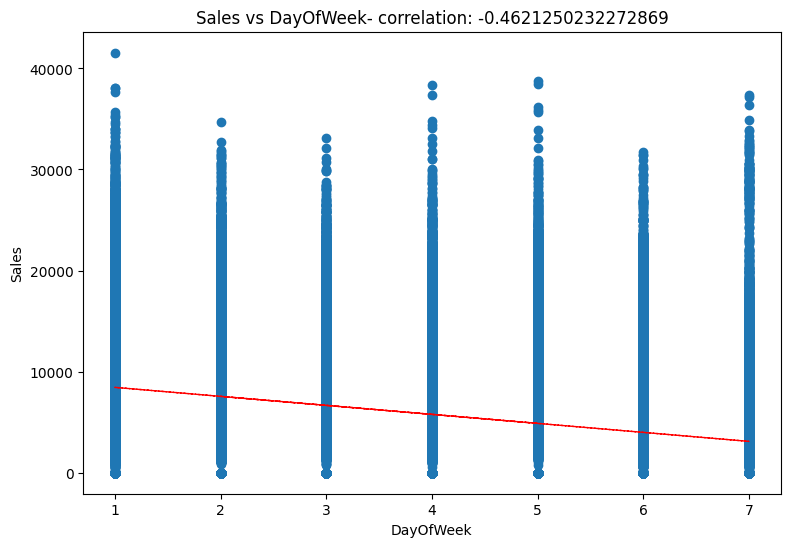

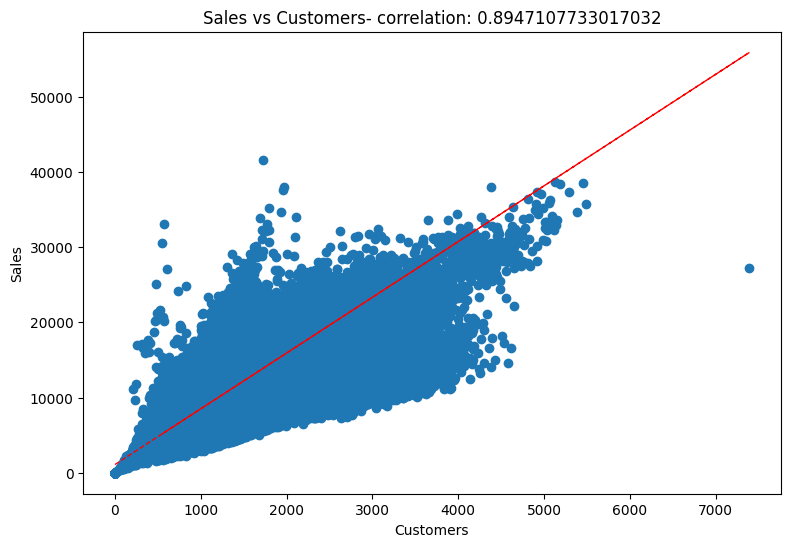

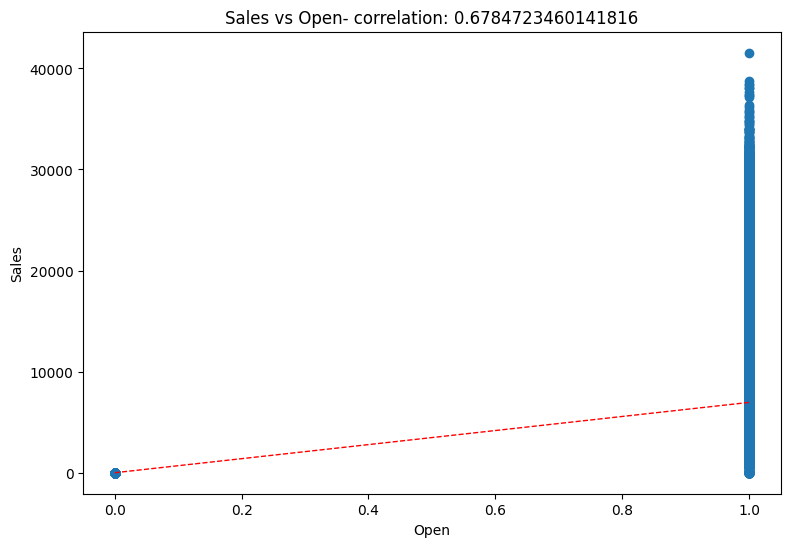

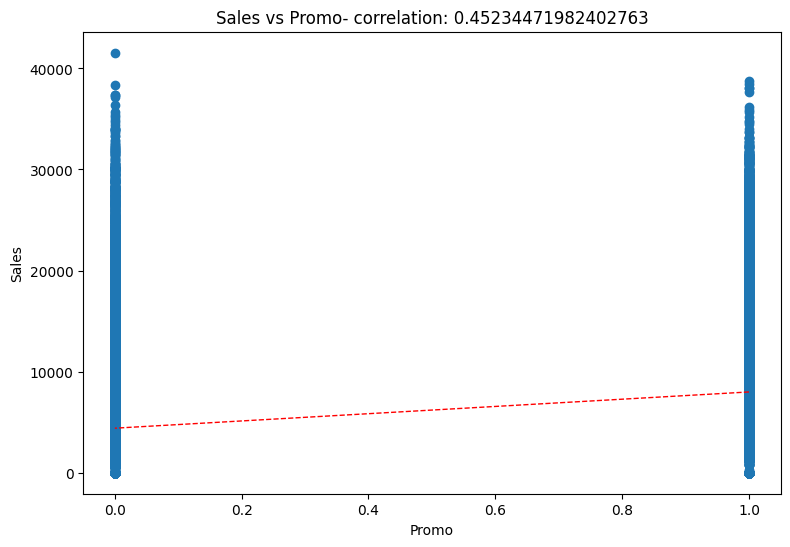

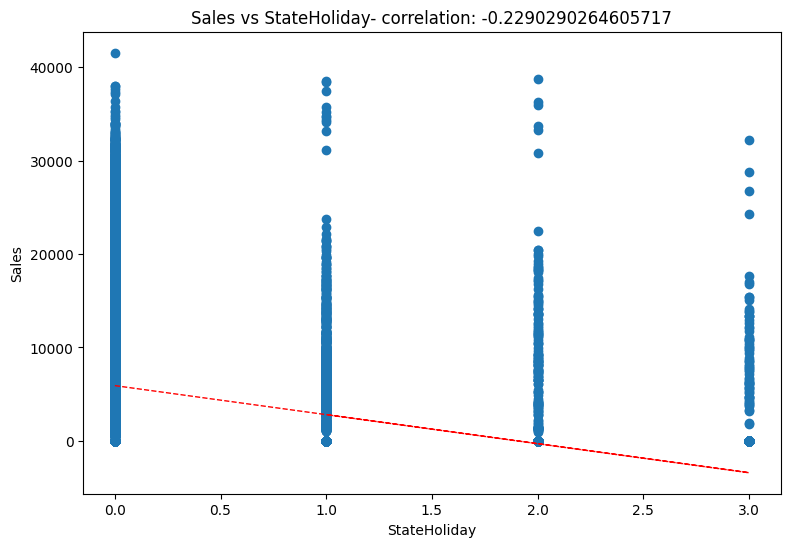

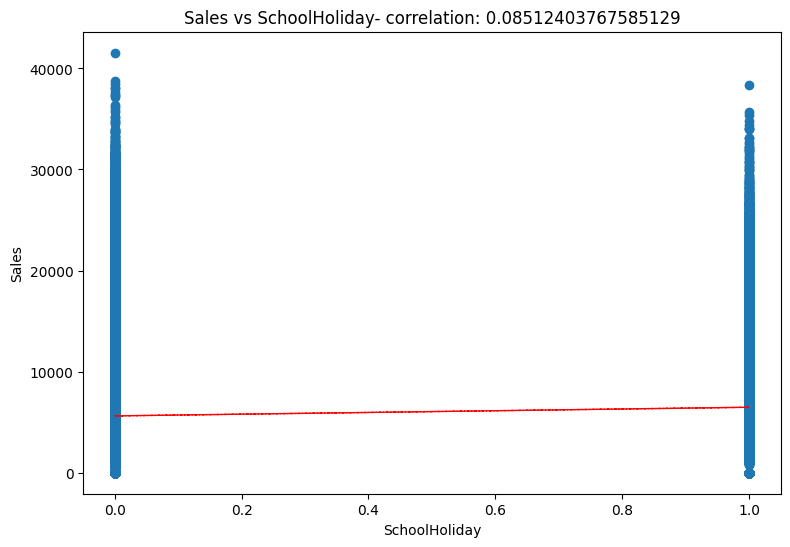

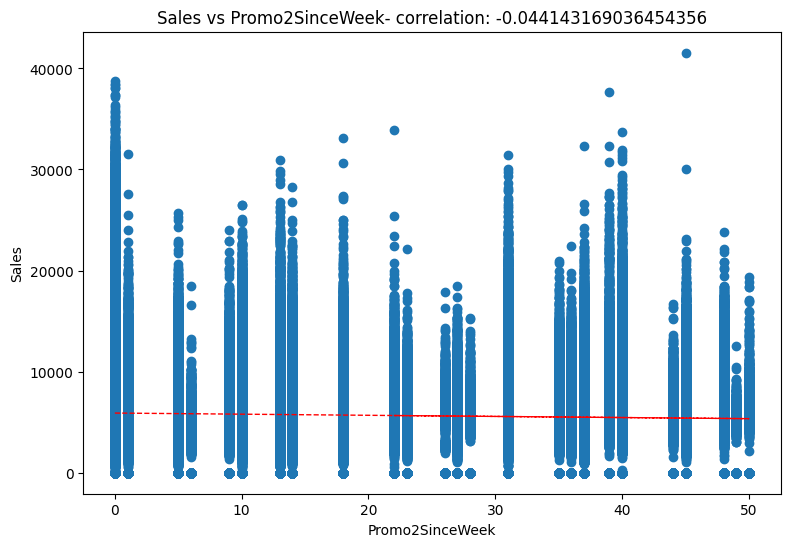

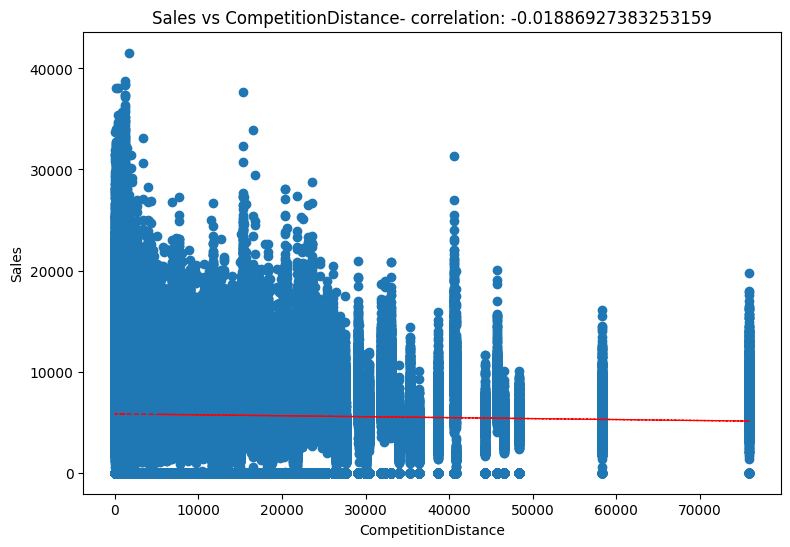

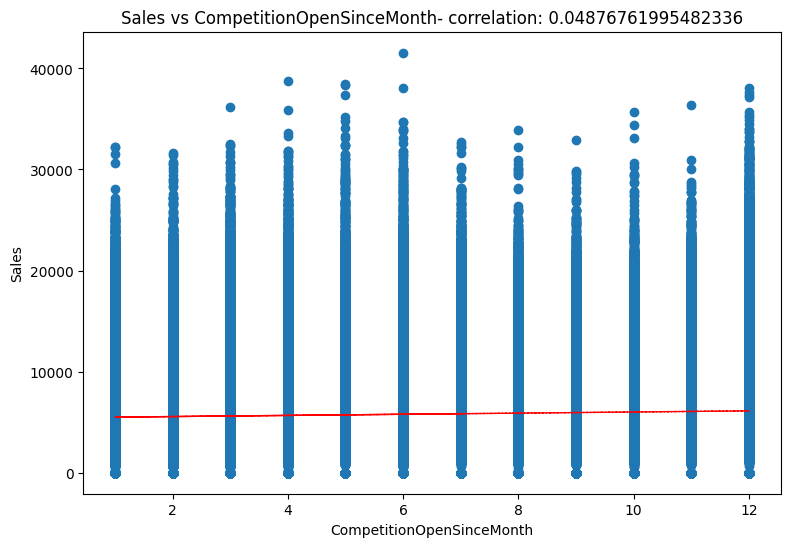

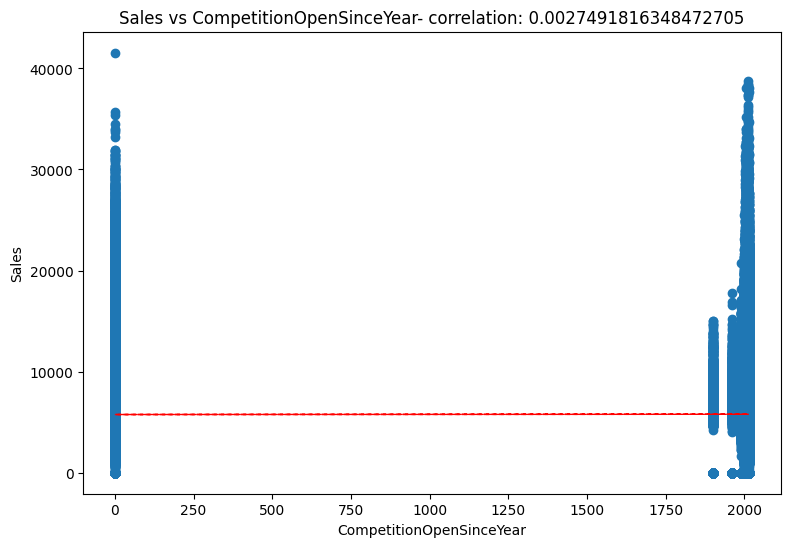

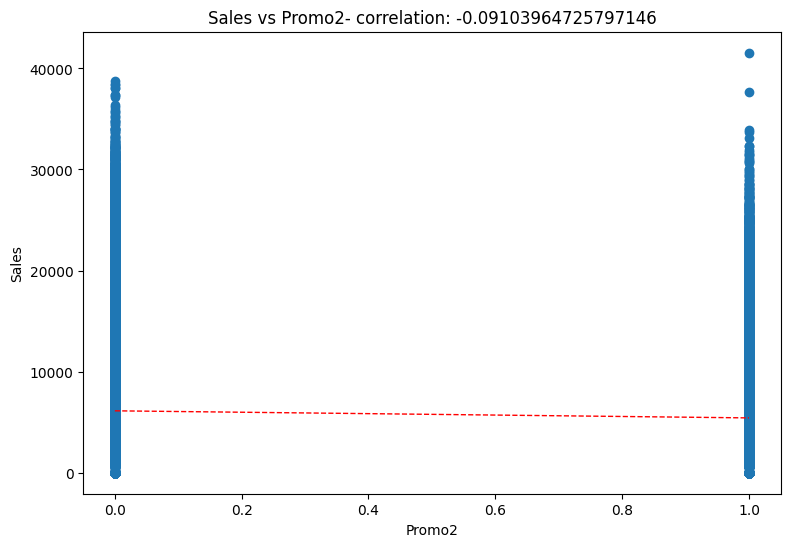

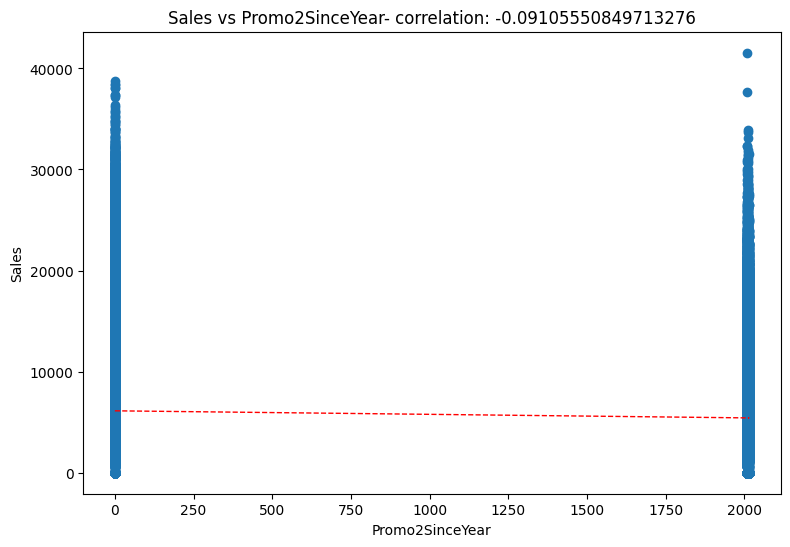

In [ ]:
for col in numeric_features[0:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = final[col]
  label = final['Sales']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Sales')
  ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(final[col], final['Sales'], 1)
  y_hat = np.poly1d(z)(final[col])

  plt.plot(final[col], y_hat, "r--", lw=1)

<ipython-input-48-07ea51458557>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final.corr()


<Axes: >

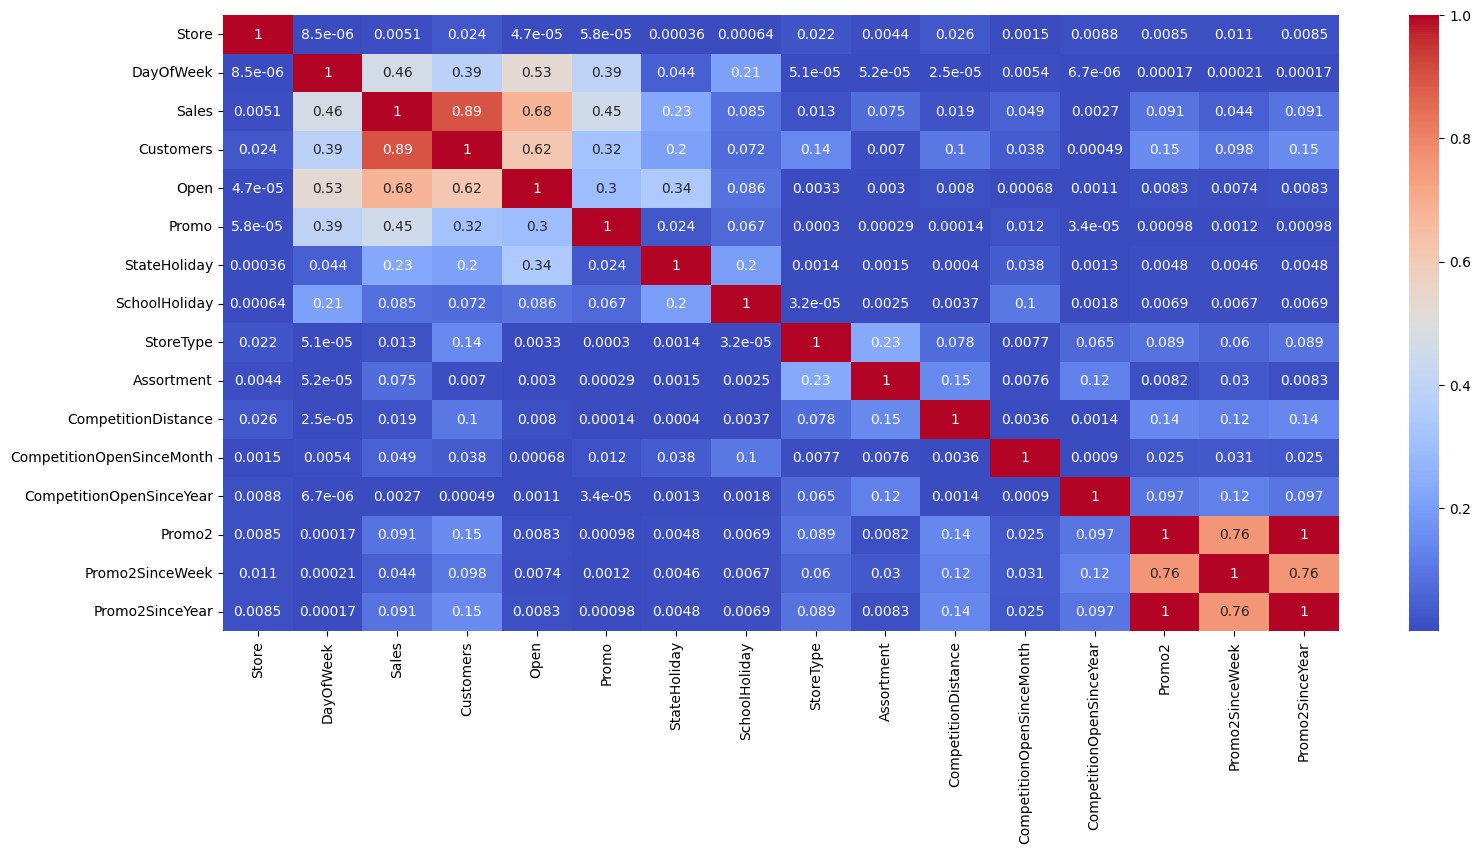

In [ ]:
plt.figure(figsize=(18,8))
correlation = final.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## **Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
  vif = pd.DataFrame()
  vif["variable"] = x.columns
  vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

In [ ]:
calc_vif(final[[i for i in final.describe().columns if i not in['Saales']]])

,variable,vif
0,Store,3.706097e+00
1,DayOfWeek,4.206152e+00
2,Sales,2.454071e+01
3,Customers,1.769331e+01
4,Open,1.000845e+01
5,Promo,2.205641e+00
6,StateHoliday,1.196814e+00
7,SchoolHoliday,1.330954e+00
8,StoreType,2.018765e+00
9,Assortment,2.074451e+00


In [ ]:
calc_vif(final[[i for i in final.describe().columns if i not in ['Sales','Promo2SinceYear']]])

,variable,vif
0,Store,3.696403
1,DayOfWeek,4.104888
2,Customers,5.236788
3,Open,9.375773
4,Promo,1.917192
5,StateHoliday,1.187994
6,SchoolHoliday,1.330832
7,StoreType,1.934515
8,Assortment,2.039582
9,CompetitionDistance,1.584854


## **Analysis On Sales - Dependent Variable**

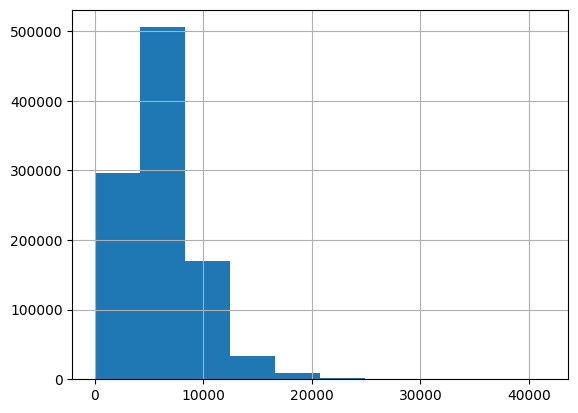

In [ ]:
pd.Series(final['Sales']).hist()
plt.show()

## **MODEL TRAINING**

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
final = pd.get_dummies(final, columns=['PromoInterval'])

In [ ]:
final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


In [ ]:
final.shape

(1017209, 21)

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final.columns.drop(['Store', 'Promo2SinceYear', 'Date', 'Sales'])

In [ ]:
# Create the data of independent variable
x = final[indep_var].values

# Create the dependent variable data
y = final[dep_var].values

In [ ]:
final[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


In [ ]:
# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state= 0)
print(x_train.shape)
print(x_test.shape)

(813767, 17)
(203442, 17)


## **LINEAR REGRESSION**

In [ ]:
# scaling the x vaues
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# fitting the data into linear regression model
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
v_pred = linear_regression.predict(x_test)
v_pred

array([ 7095.8574634 , 12610.34769778,  9196.82230715, ...,
        6937.3340259 ,  5998.87211184,  4001.57816653])

In [ ]:
linear_regression.score(x_train, y_train)

0.8677992484625304

In [ ]:
regression_Dataframe = pd.DataFrame(zip(y_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,7095.857463
1,6221,12610.347698
2,8132,9196.822307
3,20916,11531.325237
4,5472,6598.562542
...,...,...
203437,5650,6659.261760
203438,5464,6523.255901
203439,6191,6937.334026
203440,5663,5998.872112


In [ ]:
sales_mean = final[dep_var].mean()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, v_pred)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(y_test, v_pred)
print("R2 :" ,r2)

MSE : 1944244.2290055843
RMSE : 1394.3615847424885
RMPSE : 0.24149728133677423
R2 : 0.8684253291958114


## **DECISION TREE**

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(x_train, y_train)
v_pred_dt = decision_tree.predict(x_test)
y_train_dt = decision_tree.predict(x_train)
# print('dt_regressor R^2: ', r2(y_test,v_pred_dt))
MSE = mean_squared_error(y_test,v_pred_dt)
print("MSE:", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(y_test, v_pred_dt)
print("R2 :", r2)

MSE: 1938401.7013646904
RMSE : 1392.2649537227785
RMPSE : 0.24113415408429775
R2 : 0.8688207160713626


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(y_test,v_pred_dt), columns = ['actual','pred'])
decisiontree_Dataframe

,actual,pred
0,7285,6405.437098
1,6221,10727.574980
2,8132,9096.411096
3,20916,11835.110635
4,5472,5476.684725
...,...,...
203437,5650,5476.684725
203438,5464,5476.684725
203439,6191,8169.463222
203440,5663,6405.437098


## **Random Forest Regression**

In [ ]:
from numpy.random.mtrand import random
random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(x_train,y_train)
y_pred_rf = random_forest.predict(x_test)

MSE = mean_squared_error(y_test, y_pred_rf)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(y_test, y_pred_rf)
print("R2 :", r2)

MSE : 1128476.930675265
RMSE : 1062.297948164857
RMPSE : 0.1839853229310135
R2 : 0.9236315178676595


In [ ]:
rf_Dataframe = pd.DataFrame(zip(y_test, y_pred_rf), columns = ['actual', 'pred'])
rf_Dataframe

,actual,pred
0,7285,6956.715408
1,6221,10420.772958
2,8132,9290.148838
3,20916,13783.818757
4,5472,6080.315632
...,...,...
203437,5650,6426.205634
203438,5464,5302.093073
203439,6191,7545.982994
203440,5663,6156.146380


## **LASSO**

In [ ]:
lasso = Lasso(alpha =2.0)

In [ ]:
lasso.fit(x_train,y_train)

Lasso(alpha=2.0)

In [ ]:
v_pred_lasso = lasso.predict(x_test)

In [ ]:
lasso.score(x_train, y_train)

0.8677953509133682

In [ ]:
pd.DataFrame(zip(x_test, v_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,"[0.5015984355647561, 0.6924901593748323, 0.452...",7105.291832
1,"[-0.4997637200086328, 2.0005875871801724, 0.45...",12604.614268
2,"[-1.5011258755820216, 1.0195145163261672, 0.45...",9189.398352
3,"[-1.5011258755820216, 1.08190732127083, 0.4526...",11506.763771
4,"[-1.5011258755820216, -0.0583749759936934, 0.4...",6590.279187
...,...,...
203437,"[-0.4997637200086328, -0.04761759583082054, 0....",6647.445977
203438,"[-1.5011258755820216, -0.15519139745954916, 0....",6514.346897
203439,"[-0.4997637200086328, 0.18474181568723325, 0.4...",6930.742397
203440,"[-1.5011258755820216, 0.32458775780458043, 0.4...",6003.887536


## **RIDGE**

In [ ]:
ridge = Ridge(alpha = 0.5)

In [ ]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [ ]:
v_pred_rid = ridge.predict(x_test)

In [ ]:
ridge.score(x_test, y_test)

0.8684254430035201

In [ ]:
MSE = mean_squared_error(y_test, v_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(y_test, v_pred_rid)
print("R2 :" , r2)

MSE : 1944242.5472990717
RMSE : 1394.3609817041897
RMPSE : 0.24149717689319855
R2 : 0.8684254430035201


## **Conclusion From Model Training**

* We were also curious about the total dataset (including sales= 0 rows). So we trained model using various algorithns and we got accuracy near about 92%.

* We came to conclusion that removing sales= 0 rows actually removes lot of information from dataset as it has 172817 rows which is large and therefore we decided not to remove those values. We got our best RMPSE score from Random Forest model, we tried taking an optimum parameter so that our model doesn't overfit.

## **Conclution from **

1 From plot sales competition open since month shows sales increasing
  from november and highest in month december.

2 From plot sales and a day of week, sales highest on monday and start
  declining from tuesday to saturday and on sundaysales almost near to zero.

3 Plot between promotion and sales shows that promotion helps in
  increasing sales.

4 Type of store place an important role in opening pattern of stores.

5 All type 'b' stores never closed except for refurbishment or other
  reason.

6 All type 'b' stores have comparitivly higher sales and it mostly
  constant with peaks appears on week ends.

7 Assortment level 'b' is only offered at store tybe 'b'.

8 We can observe that most of the stores remained closed during state
  holidays but it is interesting to note that the number of stores opened during school holidays were more than that were opened  during   state holidays.